In [ ]:
%load_ext autoreload
%autoreload 2


In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

from src.ksd.ksd import KSD
from src.ksd.kernel import RBF, IMQ

In [ ]:
tf.random.set_seed(0)

In [ ]:
target = tfd.MultivariateNormalDiag([0.])
proposal = tfd.MultivariateNormalDiag([0.])

# kernel = RBF()
kernel = IMQ()

In [ ]:
proposal_sample = proposal.sample(3)

In [ ]:
ksd = KSD(target=target, kernel=kernel)
ksd_val = ksd(proposal_sample, tf.identity(proposal_sample)).numpy()

In [ ]:
def ff(x, y, beta):
    return (1 + 1/2. * (x - y)**2)**beta

In [4]:
proposal_sample = proposal.sample(10)

In [5]:
_ = plt.hist(proposal_sample.numpy())

In [6]:
ksd = KSD(target=target, kernel=kernel)
ksd_val = ksd(proposal_sample, tf.identity(proposal_sample)).numpy()
ksd_val

12.771986

In [366]:
def run_ksd_experiment(nrep, target, proposal):
    """compute KSD and repeat for nrep times"""
    ksd = KSD(target=target, kernel=kernel)
    
    nsamples_list = list(range(10, 100, 10)) + list(range(100, 1100, 100))
    ksd_list = []
    ksd_df = pd.DataFrame(columns=["n", "ksd", "seed"])
    for n in nsamples_list:
        print(f"n = {n}")
        ksd_n_list = []
        for seed in range(nrep):
            proposal_sample = proposal.sample(n)
            ksd_val = ksd(proposal_sample, tf.identity(proposal_sample)).numpy()
            ksd_n_list.append(ksd_val)
            ksd_df.loc[len(ksd_df)] = [n, ksd_val, seed]
    return ksd_df

In [367]:
nrep = 10

ksd_df = run_ksd_experiment(nrep, target, proposal)

n = 10
n = 20
n = 30
n = 40
n = 50
n = 60
n = 70
n = 80
n = 90
n = 100
n = 200
n = 300
n = 400
n = 500
n = 600
n = 700
n = 800
n = 900
n = 1000


(0.0, 2.4670787836164236)

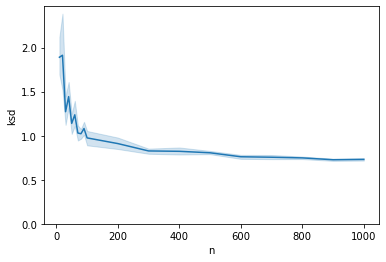

In [337]:
sns.lineplot(data=ksd_df, x="n", y="ksd")
plt.ylim((0, None))

In [338]:
def create_mixture_gaussian(dim, delta):
    e1 = tf.eye(dim)[:, 0]
    mix_gauss = tfd.Mixture(
      cat=tfd.Categorical(probs=[0.5, 0.5]),
      components=[
        tfd.MultivariateNormalDiag(-delta * e1),
        tfd.MultivariateNormalDiag(-delta * e1)
    ])
    return mix_gauss
    

In [340]:
delta = 1.5
dim = 1

target = create_mixture_gaussian(dim=dim, delta=delta)

proposal_mean = - delta * tf.eye(dim)[:, 0]
proposal = tfd.MultivariateNormalDiag(proposal_mean)

In [341]:
ksd_df = run_ksd_experiment(nrep, target, proposal)

n = 10
n = 20
n = 30
n = 40
n = 50
n = 60
n = 70
n = 80
n = 90
n = 100
n = 200
n = 300
n = 400
n = 500
n = 600
n = 700
n = 800
n = 900
n = 1000


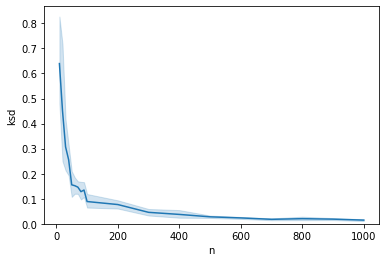

In [342]:
sns.lineplot(data=ksd_df, x="n", y="ksd")
_ = plt.ylim((0, None))

In [ ]:
ksd_df = run_ksd_experiment(nrep, target, proposal)